In [1]:
!pip3 install autoPyTorch

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 711 kB 5.2 MB/s 
     |████████████████████████████████| 4.4 MB 39.7 MB/s 
     |████████████████████████████████| 22.3 MB 1.4 MB/s 
     |████████████████████████████████| 202 kB 61.8 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 76.8 MB 1.2 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 4.9 MB 40.3 MB/s 
     |████████████████████████████████| 46 kB 3.6 MB/s 
  Created wheel for smac: filename=smac-1.4.0-py3-none-any.whl size=262352 sha256=fbf289bd1ce945c10cf9f7bb042c8c1530bc6bbca2fc8409d4abf695a3311d5d
  Stored in directory: /root/.cache/pip/wheels/70/01/53/

In [2]:
import numpy as np
import pandas as pd 
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
import sklearn.metrics
import time
from autoPyTorch.api.tabular_classification import TabularClassificationTask


LOADING DATA

In [3]:
TrainDataSet= pd.read_csv('../content/Breast_Cancer.csv')
TrainDataSet.head()


,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,68,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,4,Positive,Positive,24,1,60,Alive
1,50,White,Married,T2,N2,IIIA,Moderately differentiated,2,Regional,35,Positive,Positive,14,5,62,Alive
2,58,White,Divorced,T3,N3,IIIC,Moderately differentiated,2,Regional,63,Positive,Positive,14,7,75,Alive
3,58,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,18,Positive,Positive,2,1,84,Alive
4,47,White,Married,T2,N1,IIB,Poorly differentiated,3,Regional,41,Positive,Positive,3,1,50,Alive


Data transformation

In [4]:
df = TrainDataSet

#Target
df['target'] = df['Status'].apply(lambda x: '1' if x == "Alive" else 0)

#Transformacion de Race
df.loc[df['Race'] == 'White', 'Race'] = 1
df.loc[df['Race'] == 'Black', 'Race'] = 2
df.loc[df['Race'] == 'Other', 'Race'] = 3

#Transformacion de Marital Status
df.loc[df['Marital Status'] == 'Married', 'Marital Status'] = 1
df.loc[df['Marital Status'] == 'Single ', 'Marital Status'] = 2
df.loc[df['Marital Status'] == 'Divorced', 'Marital Status'] = 3
df.loc[df['Marital Status'] == 'Widowed', 'Marital Status'] = 4
df.loc[df['Marital Status'] == 'Separated', 'Marital Status'] = 5

#Transformacion de T Stage 
df.loc[df['T Stage '] == 'T1', 'T Stage '] = 1
df.loc[df['T Stage '] == 'T2', 'T Stage '] = 2
df.loc[df['T Stage '] == 'T3', 'T Stage '] = 3
df.loc[df['T Stage '] == 'T4', 'T Stage '] = 4

#Transformacion de N Stage 
df.loc[df['N Stage'] == 'N1', 'N Stage'] = 1
df.loc[df['N Stage'] == 'N2', 'N Stage'] = 2
df.loc[df['N Stage'] == 'N3', 'N Stage'] = 3

#Transformacion de 6th Stage
df.loc[df['6th Stage'] == 'IIA', '6th Stage'] = 1
df.loc[df['6th Stage'] == 'IIB', '6th Stage'] = 2
df.loc[df['6th Stage'] == 'IIIA', '6th Stage'] = 3
df.loc[df['6th Stage'] == 'IIIC', '6th Stage'] = 4
df.loc[df['6th Stage'] == 'IIIB', '6th Stage'] = 5

#Transformacion de differentiate
df.loc[df['differentiate'] == 'Moderately differentiated', 'differentiate'] = 1
df.loc[df['differentiate'] == 'Poorly differentiated', 'differentiate'] = 2
df.loc[df['differentiate'] == 'Well differentiated', 'differentiate'] = 3
df.loc[df['differentiate'] == 'Undifferentiated', 'differentiate'] = 4
df.loc[df['differentiate'] == 'Undifferentiated', 'differentiate'] = 5

#Transformacion de Grade
df.loc[df['Grade'] == ' anaplastic; Grade IV', 'Grade'] = 4

#Transformacion de A Stage	
df.loc[df['A Stage'] == 'Regional', 'A Stage'] = 1
df.loc[df['A Stage'] == 'Distant', 'A Stage'] = 2

#Transformacion de Estrogen Status	
df.loc[df['Estrogen Status'] == 'Positive', 'Estrogen Status'] = 1
df.loc[df['Estrogen Status'] == 'Negative', 'Estrogen Status'] = 2

#Transformacion de Progesterone  Status	
df.loc[df['Progesterone Status'] == 'Positive', 'Progesterone Status'] = 1
df.loc[df['Progesterone Status'] == 'Negative', 'Progesterone Status'] = 2

#Transformacion de Status	
df.loc[df['Status'] == 'Alive', 'Status'] = 1
df.loc[df['Status'] == 'Dead', 'Status'] = 2

df

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status,target
0,68,1,1,1,1,1,2,3,1,4,1,1,24,1,60,1,1
1,50,1,1,2,2,3,1,2,1,35,1,1,14,5,62,1,1
2,58,1,3,3,3,4,1,2,1,63,1,1,14,7,75,1,1
3,58,1,1,1,1,1,2,3,1,18,1,1,2,1,84,1,1
4,47,1,1,2,1,2,2,3,1,41,1,1,3,1,50,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4019,62,3,1,1,1,1,1,2,1,9,1,1,1,1,49,1,1
4020,56,1,3,2,2,3,1,2,1,46,1,1,14,8,69,1,1
4021,68,1,1,2,1,2,1,2,1,22,1,2,11,3,69,1,1
4022,58,2,3,2,1,2,1,2,1,44,1,1,11,1,72,1,1


In [5]:
df.to_excel(r'test.xlsx', index = False)

KeyboardInterrupt: ignored

DATA CLEANING

In [6]:
input_cols = df.columns[:-1]
input_cols


Index(['Age', 'Race', 'Marital Status', 'T Stage ', 'N Stage', '6th Stage',
       'differentiate', 'Grade', 'A Stage', 'Tumor Size', 'Estrogen Status',
       'Progesterone Status', 'Regional Node Examined',
       'Reginol Node Positive', 'Survival Months', 'Status'],
      dtype='object')

In [7]:
target_col =  df.columns[-1]
target_col

'target'

In [8]:
inputs_df = df[list(input_cols)].copy()
inputs_df

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,68,1,1,1,1,1,2,3,1,4,1,1,24,1,60,1
1,50,1,1,2,2,3,1,2,1,35,1,1,14,5,62,1
2,58,1,3,3,3,4,1,2,1,63,1,1,14,7,75,1
3,58,1,1,1,1,1,2,3,1,18,1,1,2,1,84,1
4,47,1,1,2,1,2,2,3,1,41,1,1,3,1,50,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4019,62,3,1,1,1,1,1,2,1,9,1,1,1,1,49,1
4020,56,1,3,2,2,3,1,2,1,46,1,1,14,8,69,1
4021,68,1,1,2,1,2,1,2,1,22,1,2,11,3,69,1
4022,58,2,3,2,1,2,1,2,1,44,1,1,11,1,72,1


In [9]:
targets = df[(target_col)]
targets

0       1
1       1
2       1
3       1
4       1
       ..
4019    1
4020    1
4021    1
4022    1
4023    1
Name: target, Length: 4024, dtype: object

AUTOML MODEL

In [10]:
X = inputs_df
y = targets
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X,y, test_size = 0.2, random_state=1)

X_train = X_train.astype(np.float32)
X_test = X_test.astype(np.float32)
y_train = y_train.astype(np.float32)
y_test = y_test.astype(np.float32)

#X_train = torch.from_numpy(X_train)
#X_test = torch.from_numpy(X_test)

print(type(X_train))
print(type(X_test))
print(type(y_train))
print(type(y_test))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


In [11]:
api = TabularClassificationTask()

In [12]:
start = time.time()
history = api.search(
    X_train=X_train,
    y_train=y_train,
    X_test=X_test,
    y_test=y_test,
    optimize_metric='accuracy',
    total_walltime_limit=100,
    func_eval_time_limit_secs=10
)
stop = time.time()
print(f"Training time: {stop - start}s")

[ERROR] [2022-10-25 22:39:14,952:Client-AutoPyTorch:d789e71a-54b5-11ed-8045-0242ac1c0002:1] Prediction for lgb failed with run state StatusType.CRASHED.
Additional info:
traceback: Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/autoPyTorch/evaluation/tae.py", line 61, in fit_predict_try_except_decorator
    ta(queue=queue, **kwargs)
  File "/usr/local/lib/python3.7/dist-packages/autoPyTorch/evaluation/train_evaluator.py", line 512, in eval_train_function
    evaluator.fit_predict_and_loss()
  File "/usr/local/lib/python3.7/dist-packages/autoPyTorch/evaluation/train_evaluator.py", line 189, in fit_predict_and_loss
    add_pipeline_to_self=True)
  File "/usr/local/lib/python3.7/dist-packages/autoPyTorch/evaluation/train_evaluator.py", line 364, in _fit_and_predict
    fit_and_suppress_warnings(self.logger, pipeline, X, y)
  File "/usr/local/lib/python3.7/dist-packages/autoPyTorch/evaluation/abstract_evaluator.py", line 339, in fit_and_suppress_warnings


/usr/local/lib/python3.7/dist-packages/smac/intensification/parallel_scheduling.py:155: UserWarning: Hyperband is executed with 1 workers only. Consider to use pynisher to use all available workers.
  f"{self.__class__.__name__} is executed with {num_workers} workers only. "


[WARNING] [2022-10-25 22:39:39,664:smac.runhistory.runhistory2epm.RunHistory2EPM4LogCost] Got cost of smaller/equal to 0. Replace by 0.000010 since we use log cost.
[WARNING] [2022-10-25 22:39:53,025:smac.runhistory.runhistory2epm.RunHistory2EPM4LogCost] Got cost of smaller/equal to 0. Replace by 0.000010 since we use log cost.
[WARNING] [2022-10-25 22:39:55,956:smac.runhistory.runhistory2epm.RunHistory2EPM4LogCost] Got cost of smaller/equal to 0. Replace by 0.000010 since we use log cost.
[WARNING] [2022-10-25 22:39:59,574:smac.runhistory.runhistory2epm.RunHistory2EPM4LogCost] Got cost of smaller/equal to 0. Replace by 0.000010 since we use log cost.
[WARNING] [2022-10-25 22:40:09,647:smac.runhistory.runhistory2epm.RunHistory2EPM4LogCost] Got cost of smaller/equal to 0. Replace by 0.000010 since we use log cost.
[WARNING] [2022-10-25 22:40:29,732:smac.runhistory.runhistory2epm.RunHistory2EPM4LogCost] Got cost of smaller/equal to 0. Replace by 0.000010 since we use log cost.
[WARNING] 

In [18]:
predictions = api.predict(X_test)
print("Precision", sklearn.metrics.precision_score(y_test, predictions))
print("Recall", sklearn.metrics.recall_score(y_test, predictions))
print("Loss", sklearn.metrics.log_loss(y_test, predictions))
print("Accuracy score", sklearn.metrics.accuracy_score(y_test, predictions))

Precision 1.0
Recall 1.0
Loss nan
Accuracy score 1.0


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:2283: RuntimeWarning: divide by zero encountered in log
  loss = -(transformed_labels * np.log(y_pred)).sum(axis=1)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:2283: RuntimeWarning: invalid value encountered in multiply
  loss = -(transformed_labels * np.log(y_pred)).sum(axis=1)


In [19]:
score = api.score(y_test, predictions)
print(score)

{'accuracy': 1.0}


In [20]:
print(api.show_models())

|    | Preprocessing                                                                                | Estimator                                                       |   Weight |
|---:|:---------------------------------------------------------------------------------------------|:----------------------------------------------------------------|---------:|
|  0 | None                                                                                         | RFLearner                                                       |     0.3  |
|  1 | None                                                                                         | KNNLearner                                                      |     0.2  |
|  2 | None                                                                                         | CBLearner                                                       |     0.16 |
|  3 | SimpleImputer,Variance Threshold,NoCoalescer,NoEncoder,StandardScaler,NoFeaturePreprocessing | no 

Predecir nuevos resultados

In [24]:
len(y_test)

805

In [32]:
y_pred = api.predict(X_test)
y_test = np.array(y_test)

error = 0;

for i in range(len(y_test)):
  print("valor real: ", y_test[i])
  print("valor estimado: ", y_pred[i])
  if(y_test[i] != y_pred[i]):
    error = error + 1;
  print("---------------------------------- ")

error_rate = error  / len(y_test) 
print("Error: ",error_rate)

valor real:  0.0
valor estimado:  0.0
---------------------------------- 
valor real:  1.0
valor estimado:  1.0
---------------------------------- 
valor real:  1.0
valor estimado:  1.0
---------------------------------- 
valor real:  1.0
valor estimado:  1.0
---------------------------------- 
valor real:  1.0
valor estimado:  1.0
---------------------------------- 
valor real:  1.0
valor estimado:  1.0
---------------------------------- 
valor real:  1.0
valor estimado:  1.0
---------------------------------- 
valor real:  1.0
valor estimado:  1.0
---------------------------------- 
valor real:  1.0
valor estimado:  1.0
---------------------------------- 
valor real:  1.0
valor estimado:  1.0
---------------------------------- 
valor real:  1.0
valor estimado:  1.0
---------------------------------- 
valor real:  1.0
valor estimado:  1.0
---------------------------------- 
valor real:  1.0
valor estimado:  1.0
---------------------------------- 
valor real:  0.0
valor estimado:  0.0


Curva de precision

In [28]:
print(api.sprint_statistics())

autoPyTorch results:
	Dataset name: d789e71a-54b5-11ed-8045-0242ac1c0002
	Optimisation Metric: accuracy
	Best validation score: 1.0
	Number of target algorithm runs: 13
	Number of successful target algorithm runs: 6
	Number of crashed target algorithm runs: 4
	Number of target algorithms that exceeded the time limit: 3
	Number of target algorithms that exceeded the memory limit: 0



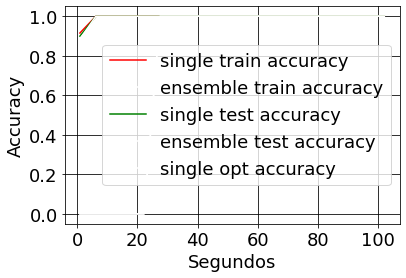

In [ ]:
from autoPyTorch.utils.results_visualizer import PlotSettingParams,ColorLabelSettings
metric_name = 'accuracy'

params = PlotSettingParams(
    #xscale='log',
    xlabel='Segundos',
    ylabel='Accuracy',
    #title='Toy Example',
    
    legend=True,
    figname= None,#'example_plot_over_time.png',
    #savefig_kwargs={'bbox_inches': 'tight'},
    show=True,  # If you would like to show, make it True and set figname=None,

)

api.plot_perf_over_time(
    metric_name=metric_name,
    plot_setting_params=params,
    #marker='*',
    #markersize=10,
    color_label_settings= ColorLabelSettings(single_train=('red', None), single_opt=('white', None), single_test=('green', None), ensemble_train=('white', None), ensemble_test=('white', None))
)
